In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as Functional
import torch.optim as optim
from torchvision.utils import save_image
import os
%matplotlib inline

In [2]:
num_epochs = 10
batch_size = 128
learning_rate = 1e-3
IsCuda = torch.cuda.is_available()

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset = torchvision.datasets.MNIST(root = './data', train = True,
                                       download = True, transform = transform)

data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)

In [4]:
if not os.path.exists('./genImg'):
    os.mkdir('./genImg')

def imShow(img):
    # Denormalize
    img = img / 2 + 0.5
    npImg = img.numpy()
    plt.imshow(np.transpose(npImg, (1, 2, 0)))
    
    
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x

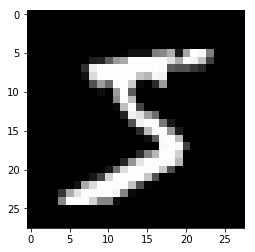

In [5]:
sampleImg = iter(dataset)
images, _ = sampleImg.next()
imShow(torchvision.utils.make_grid(images))
#plt.imshow(to_img(images))

In [6]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, 12),
            nn.ReLU(True),
            nn.Linear(12, 3)        
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 784),
            # nn.ReLU(True)
            nn.Tanh()
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = AutoEncoder().cuda() if IsCuda else AutoEncoder()
print model

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128)
    (1): ReLU(inplace)
    (2): Linear(in_features=128, out_features=64)
    (3): ReLU(inplace)
    (4): Linear(in_features=64, out_features=12)
    (5): ReLU(inplace)
    (6): Linear(in_features=12, out_features=3)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12)
    (1): ReLU(inplace)
    (2): Linear(in_features=12, out_features=64)
    (3): ReLU(inplace)
    (4): Linear(in_features=64, out_features=128)
    (5): ReLU(inplace)
    (6): Linear(in_features=128, out_features=784)
    (7): Tanh()
  )
)


In [7]:
class AutoEncoderLeaky(nn.Module):
    def __init__(self):
        super(AutoEncoderLeaky, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.LeakyReLU(0.1),
            nn.Linear(128, 64),
            nn.LeakyReLU(0.1),
            nn.Linear(64, 12),
            nn.LeakyReLU(0.1),
            nn.Linear(12, 3)        
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.LeakyReLU(0.1),
            nn.Linear(12, 64),
            nn.LeakyReLU(0.1),
            nn.Linear(64, 128),
            nn.LeakyReLU(0.1),
            nn.Linear(128, 784),
            # nn.ReLU(True)
            nn.Tanh()
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

modelLeaky = AutoEncoderLeaky().cuda() if IsCuda else AutoEncoderLeaky()
print modelLeaky

AutoEncoderLeaky(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128)
    (1): LeakyReLU(0.1)
    (2): Linear(in_features=128, out_features=64)
    (3): LeakyReLU(0.1)
    (4): Linear(in_features=64, out_features=12)
    (5): LeakyReLU(0.1)
    (6): Linear(in_features=12, out_features=3)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12)
    (1): LeakyReLU(0.1)
    (2): Linear(in_features=12, out_features=64)
    (3): LeakyReLU(0.1)
    (4): Linear(in_features=64, out_features=128)
    (5): LeakyReLU(0.1)
    (6): Linear(in_features=128, out_features=784)
    (7): Tanh()
  )
)


In [8]:
class AutoEncoderT(nn.Module):
    def __init__(self):
        super(AutoEncoderT, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 12),
            nn.Tanh(),
            nn.Linear(12, 3)        
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.Tanh(),
            nn.Linear(12, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 784),
            # nn.ReLU(True)
            nn.Tanh()
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

modelTanH = AutoEncoderT().cuda() if IsCuda else AutoEncoderT()
print modelTanH

AutoEncoderT(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=12)
    (5): Tanh()
    (6): Linear(in_features=12, out_features=3)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12)
    (1): Tanh()
    (2): Linear(in_features=12, out_features=64)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=128)
    (5): Tanh()
    (6): Linear(in_features=128, out_features=784)
    (7): Tanh()
  )
)


In [9]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay = 1e-5)
optimizerT = torch.optim.Adam(modelTanH.parameters(), lr = learning_rate, weight_decay = 1e-5)
optimizerL = torch.optim.Adam(modelLeaky.parameters(), lr = learning_rate, weight_decay = 1e-5)


models = [['ReLu', model, optimizer], ['LeakyReLu', modelLeaky, optimizerT], ['TanH', modelTanH, optimizerL]]

for i in models:
    if not os.path.exists('./genImg/'+i[0]):
        os.mkdir('./genImg/'+i[0])

In [12]:
outputImages = []
reluLoss = []
tanLoss = []
for epoch in range(num_epochs):
    for data in data_loader:
        img, _ = data
        # print img.shape
        img = img.view(img.size(0), -1)
        # print img.shape
        img = Variable(img).cuda() if IsCuda else Variable(img)
        
        # Forward
        output = model(img)
        outputT = modelAllTanh(img)
        loss = criterion(output, img)
        lossT = criterion(outputT, img)
        
        # Backward
        optimizer.zero_grad()
        optimizerT.zero_grad()
        
        loss.backward()
        optimizer.step()
        
        lossT.backward()
        optimizerT.step()
        
    # Log
    # if epoch % 10 == 9:
    # print output.shape
    print 'Epoch [{}/{}], Loss ReLu: {:.4f}, Loss TanH: {:.4f}'.format(epoch+1, num_epochs, loss.data[0], lossT.data[0])
    pic = to_img(output.cpu().data)
    outputImages.append(pic)
    save_image(pic, './genImg/ReLu/image_{}.png'.format(epoch))
    pic = to_img(outputT.cpu().data)
    outputImages.append(pic)
    save_image(pic, './genImg/TanH/image_{}.png'.format(epoch))

Epoch [1/10], Loss:0.1971
Epoch [2/10], Loss:0.1625
Epoch [3/10], Loss:0.1611
Epoch [4/10], Loss:0.1554
Epoch [5/10], Loss:0.1618
Epoch [6/10], Loss:0.1369
Epoch [7/10], Loss:0.1457
Epoch [8/10], Loss:0.1395
Epoch [9/10], Loss:0.1358
Epoch [10/10], Loss:0.1405


In [10]:
outputImages = []
for em in models:
    tmpModel = em[1]
    tmpOpt = em[2]
    print 'Model: ', em[0]
    for epoch in range(num_epochs):
        for data in data_loader:
            img, _ = data
            # print img.shape
            img = img.view(img.size(0), -1)
            # print img.shape
            img = Variable(img).cuda() if IsCuda else Variable(img)

            # Forward
            output = tmpModel(img)
            loss = criterion(output, img)

            # Backward
            tmpOpt.zero_grad()

            loss.backward()
            tmpOpt.step()
        # Log
        # if epoch % 10 == 9:
        # print output.shape
        print 'Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.data[0])
        pic = to_img(output.cpu().data)
        outputImages.append(pic)
        save_image(pic, './genImg/'+em[0]+'/image_{}.png'.format(epoch))


Model:  ReLu
Epoch [1/10], Loss: 0.1969
Epoch [2/10], Loss: 0.1742
Epoch [3/10], Loss: 0.1732
Epoch [4/10], Loss: 0.1603
Epoch [5/10], Loss: 0.1593
Epoch [6/10], Loss: 0.1576
Epoch [7/10], Loss: 0.1460
Epoch [8/10], Loss: 0.1386
Epoch [9/10], Loss: 0.1449
Epoch [10/10], Loss: 0.1515
Model:  LeakyReLu
Epoch [1/10], Loss: 0.9300
Epoch [2/10], Loss: 0.9345
Epoch [3/10], Loss: 0.9334
Epoch [4/10], Loss: 0.9312
Epoch [5/10], Loss: 0.9344
Epoch [6/10], Loss: 0.9324
Epoch [7/10], Loss: 0.9321
Epoch [8/10], Loss: 0.9296
Epoch [9/10], Loss: 0.9319
Epoch [10/10], Loss: 0.9304
Model:  TanH
Epoch [1/10], Loss: 0.9358
Epoch [2/10], Loss: 0.9368
Epoch [3/10], Loss: 0.9307
Epoch [4/10], Loss: 0.9349
Epoch [5/10], Loss: 0.9343
Epoch [6/10], Loss: 0.9329
Epoch [7/10], Loss: 0.9338
Epoch [8/10], Loss: 0.9354
Epoch [9/10], Loss: 0.9357
Epoch [10/10], Loss: 0.9311


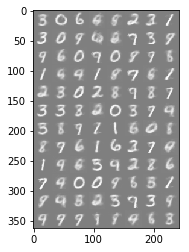

In [20]:
imShow(torchvision.utils.make_grid(outputImages[0]))

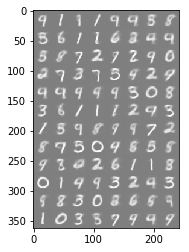

In [24]:
imShow(torchvision.utils.make_grid(outputImages[4]))

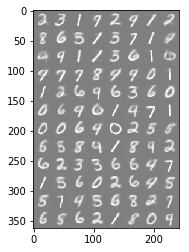

In [23]:
imShow(torchvision.utils.make_grid(outputImages[9]))